In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import math
from matplotlib.ticker import FuncFormatter

In [130]:
boston_list = pd.read_csv('./boston/calendar.csv')
boston_list.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [131]:
boston_list.dropna(inplace=True)
# process price from string to number
boston_list['price'] = boston_list['price'].apply(lambda x:x.replace('$','').replace(',','')).astype('float')
boston_list.shape[0]

643037

# mean price every day

In [132]:
date_price = boston_list['price'].groupby(boston_list['date']).mean()

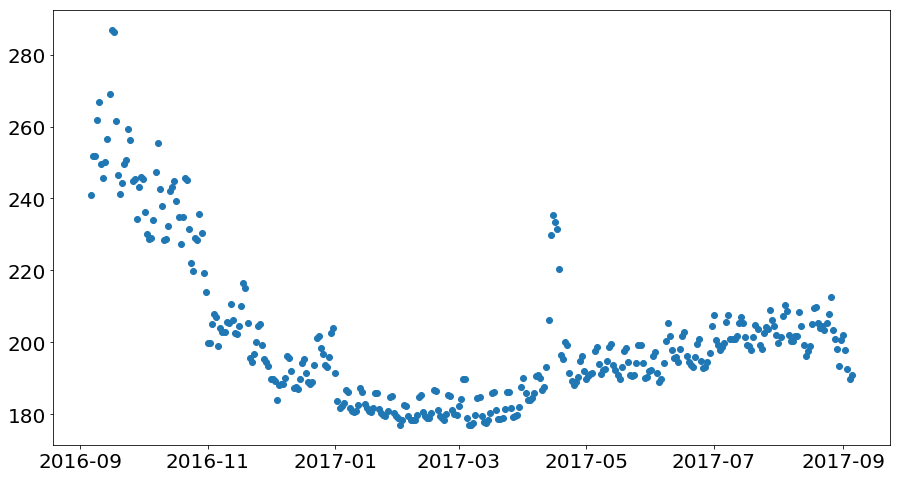

In [203]:
# price change over time 
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dates_datetime = [datetime.datetime.strptime(item, '%Y-%m-%d') for item in date_price.axes[0]]

dates_float = matplotlib.dates.date2num(dates_datetime)

plt.plot_date(dates_float, date_price.values, tz=None, xdate=True, ydate=False)
plt.show()

# what's the max change of price

In [233]:
def to_percent(y, position):
    """format y value"""
    return str(100 * round(y,3)) + '%'

In [269]:
def plot_his(data,max_value,title,xlabel,ylabel):
    """plot data
    Keyword arguments:
    data:data list
    max_value:the max value you want to show in the histogram
    title: title of histogram
    xlabel:x label
    ylabel; y label
    """
    fig,ax = plt.subplots()
    fig.set_size_inches(15, 8)
    plt.xlim([min(data), max(data)])
    gap = int(max_value / 10)
    bins = np.linspace(0,max_value,gap)
    xtrick = range(0,max_value,10)
    ax.set_xticks(xtrick)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.hist(data, bins=bins, alpha=1,weights= [1/ len(data)] * len(data))
    formatter = FuncFormatter(to_percent)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)


In [206]:

def caculate_change(value):
    """caculate max change in price of ezch host,use mode value as basal value"""
    mode_val = value.mode()
    max_val = value.max()
    return 100*(max_val-mode_val)/mode_val

In [242]:
price_change_level = boston_list['price'].groupby(boston_list['listing_id']).apply(caculate_change)
# just select value less than 300 ,count of value which is over 300 is too small
data_300 = [item for item in price_change_level.values if item < 300]
# ignore none change value
data_0_300 = [item for item in price_change_level.values if item < 300 and item >0]

In [277]:
zero_percent = 100 * len([item for item in price_change_level if item == 0])/len(price_change_level)
print("{:.1f}% of hosts didn't change their houses' price all the time".format(zero_percent))

43.9% of hosts didn't change their houses' price all the time


we can find that many hosts didn't change their houses' price.but what if you want to change price in weekends ,friday or holidays,what data can I refer to?

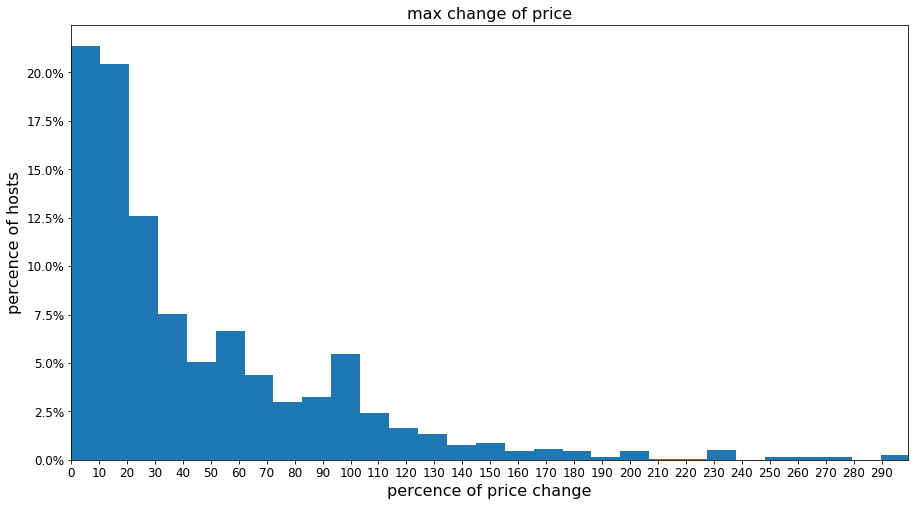

In [279]:
plot_his(data_0_300,max_value=300,title='max change of price', xlabel='percence of price change',ylabel='percence of hosts')

we can caculate that more than 50% hosts had the largest increase in their home price within 30%(Does not include the hosts who didn't change their houses's price)

# how often did they change the price

In [273]:
def change_frequence(value):
    """percent of value in the list that is different from mode value"""
    
    mode_val = value.mode().values[0]
    change = 0
    # ingnore the data if the house price record number is less than 50
    if len(value) < 50:
        return None
    for item in value:
        if item == mode_val:
            continue
        change += 1
    # ingnore price didn't change 
    if change == 0:
        return None
    return 100*change/len(value)

In [274]:
price_change_frequence = boston_list['price'].groupby(boston_list['listing_id']).apply(change_frequence)
price_change_frequence.dropna(inplace=True)

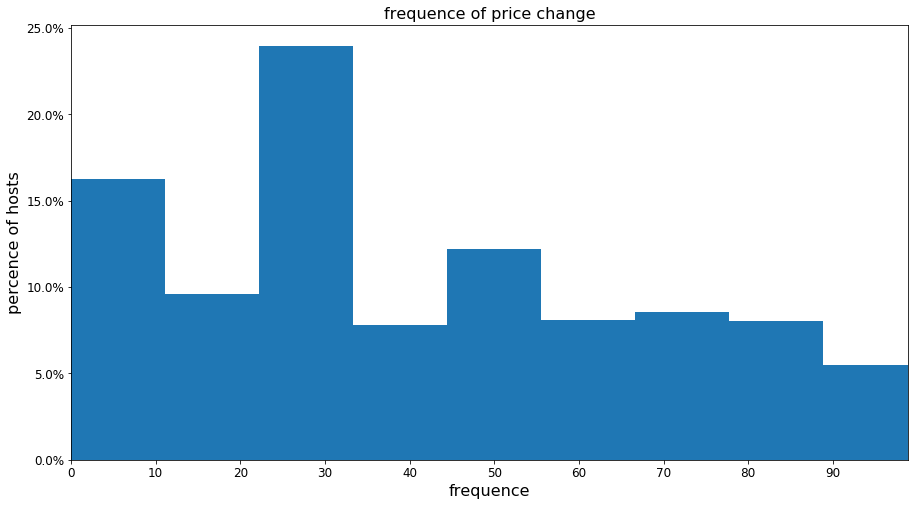

In [278]:
plot_his(price_change_frequence,max_value=100,title='frequence of price change', xlabel='frequence',ylabel='percence of hosts')

More than 20% of hosts have their home price changed between 20% and 30% of the time.it make sense that many people trend to change price on weekends or friday(Does not include the hosts who didn't change their houses's price)